Training Deep Neural Networks on a GPU with PyTorch

### Using a GPU for faster training

You can use a [Graphics Processing Unit](https://en.wikipedia.org/wiki/Graphics_processing_unit) (GPU) to train your models faster if your execution platform is connected to a GPU manufactured by NVIDIA. Follow these instructions to use a GPU on the platform of your choice:

* _Google Colab_: Use the menu option "Runtime > Change Runtime Type" and select "GPU" from the "Hardware Accelerator" dropdown.
* _Kaggle_: In the "Settings" section of the sidebar, select "GPU" from the "Accelerator" dropdown. Use the button on the top-right to open the sidebar.
* _Binder_: Notebooks running on Binder cannot use a GPU, as the machines powering Binder aren't connected to any GPUs.
* _Linux_: If your laptop/desktop has an NVIDIA GPU (graphics card), make sure you have installed the [NVIDIA CUDA drivers](https://docs.nvidia.com/cuda/cuda-installation-guide-linux/index.html).
* _Windows_: If your laptop/desktop has an NVIDIA GPU (graphics card), make sure you have installed the [NVIDIA CUDA drivers](https://docs.nvidia.com/cuda/cuda-installation-guide-microsoft-windows/index.html).
* _macOS_: macOS is not compatible with NVIDIA GPUs


If you do not have access to a GPU or aren't sure what it is, don't worry, you can execute all the code in this tutorial just fine without a GPU.

In [ ]:
#preparing the data

In [2]:
import torch
import numpy as np
import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader



We can download the data and create a PyTorch dataset using the `MNIST` class from `torchvision.datasets`. 

In [3]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())

In [4]:
img , label = dataset[0]
img.shape , label

#(torch.Size([1, 28, 28]), 5)
#(torch.size([1 means it was one channel i.e if it wa colour image ot will show 3 , 28 means pixel , 28 means pixel ]) , it was label of image)

(torch.Size([1, 28, 28]), 5)

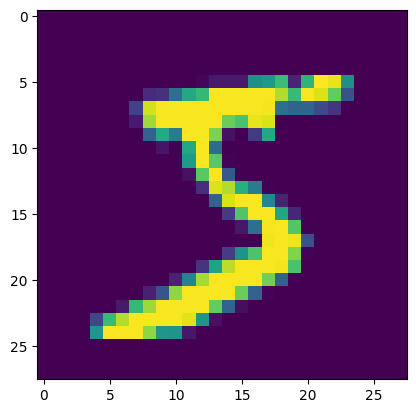

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img[0])

In [7]:
img[0, 10:15, 10:15]

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])

next , we define and use function split_indicies to pick a ranodm 20 % fraction of the images for the validation set

In [8]:
def split_indices(n, val_pct):
    #determine size of validation set
    n_val = int(val_pct*n)
    #cretae a ranodm permutation of 0 to n-1  ( 0 to 59999 images it will take)
    idxs = np.random.permutation(n)
    #pick first n_val indices for validation set
    return idxs[n_val:], idxs[:n_val]
           #idxs[m_val: = rest of the indexes for training], idxs[]


In [9]:
train_indices , val_indices = split_indices(len(dataset) , val_pct=0.2)

print(len(train_indices), len(val_indices))
print('sample val indices : ' , val_indices[:20])


48000 12000
sample val indices :  [36192 26839 39962 24929 43710 25194 57063 49568 52762  6979  8495 25454
 34915    55 57581 46920 37020 22924 31581 22224]


we can now create pytorch data laoders for each of the subsets using a subsetRandomSampler , which samples elements randomly from a given list of indices  ,while creating batches of data

In [11]:
batch_size = 100

#training sampler and data laoder
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset,
                      batch_size,
                      sampler=train_sampler)

#validation sampler and data loader
valid_sampler  = SubsetRandomSampler(val_indices)
valid_dl = DataLoader(dataset,
                      batch_size,
                      sampler=valid_sampler)
